# Introduction

PyTorch is a machine learning (ML) library based on the Torch library. It provides flexible tools for machine learning practitioners and researchers to build and train neural networks. It can be used for applications such as computer vision and natural language processing, originally developed by Meta AI and now part of the Linux Foundation umbrella. 

Below is a comprehensive summary of PyTorch fundamentals, which covers key aspects such as its core components, data handling, model building, and training process.

### *Recap*

ML is a subset of AI, and deep learning is a subset of ML. Wait, but what is the difference between machine learning and deep learning? Deep learning is a subset of machine learning that uses multiple and numerous layers of non-linear transforms to progressively extract features from row input. Wait, what? Deep learning is called deep because it uses multiple layers of neural networks. Every layer is trained by algorithms. It takes its inputs from previous layers and progressively refines them in order to minimize their errors and improve accuracy.

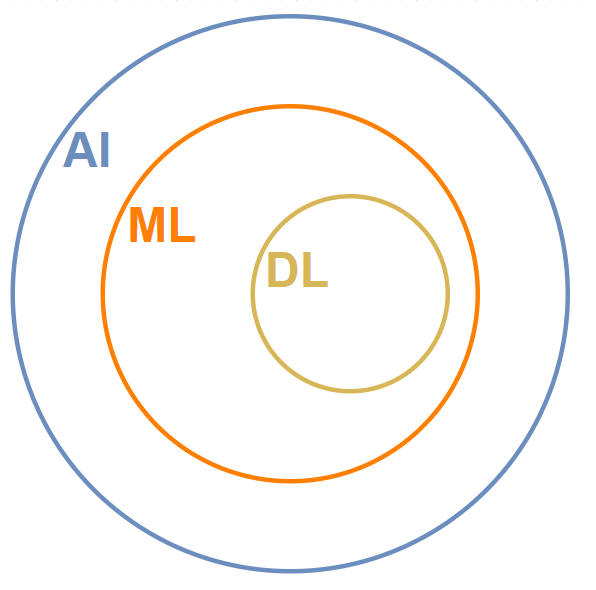


#### Applications

Before going into details, You may wonder where we can apply deep learning? There are numerous use cases, some of them are:

1. Speech recognition.
2. Anomaly detection from videos.
3. Machine translation.
4. Speech-to-text conversation.

### Why PyTorch?

- Facilitates building deep learning projects.
- Easily run array-based calculations.
- Build dynamic neural networks.
- Perform auto differentation with a string GPU accelaration.

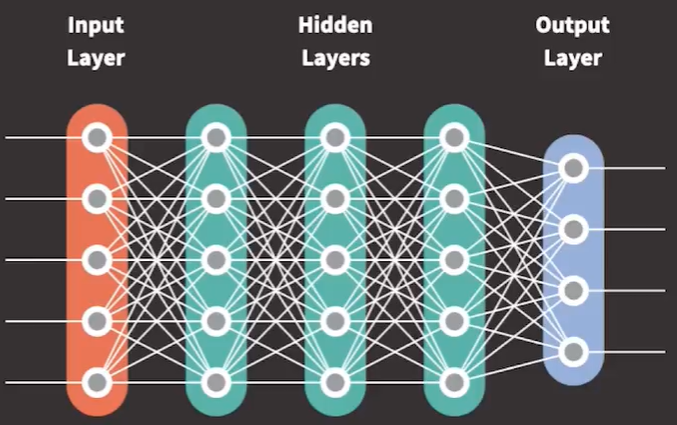

### PyTorch Fundamentals

#### 1. Introduction to PyTorch
- **Overview:** PyTorch is a dynamic, flexible framework for deep learning, known for its ease of use and efficient handling of tensors.
- **Dynamic Computation Graphs:** Unlike static graph frameworks (like TensorFlow 1.x), PyTorch builds the computation graph dynamically, which makes it intuitive and easy to debug.

#### 2. Tensors
- **Definition:** Tensors are the core data structure in PyTorch, analogous to NumPy arrays but with GPU acceleration.

- **Creation and Initialization:**

In [ ]:
import torch

# Creating a tensor from a list
x = torch.tensor([1, 2, 3])

# Creating a tensor of a specific shape filled with zeros
zeros = torch.zeros((2, 3))

# Creating a tensor with random values
random_tensor = torch.randn((3, 3))

- **Operations:** PyTorch supports various tensor operations like slicing, reshaping, arithmetic operations, and matrix multiplications.

In [ ]:
y = x + 2        # Element-wise addition
z = torch.matmul(x, y)  # Matrix multiplication

#### 3. Autograd (Automatic Differentation)

- **Gradient Computation:** PyTorch’s **autograd** module automatically computes gradients, which are essential for backpropagation in neural networks.

In [ ]:
x = torch.tensor([2.0, 3.0], requires_grad=True)
y = x * 2
y.backward(torch.tensor([1.0, 1.0]))  # Computes the gradients
print(x.grad)  # Output: tensor([2., 2.])

- **Dynamic Graphs:** Each computation in PyTorch builds a computational graph dynamically, allowing for flexible model design and easy debugging.

#### 4. Building Neural Networks

- **torch.nn Module:** Provides tools to construct neural networks, including predefined layers and loss functions.

In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

- **Forward Method:** Defines the forward pass of the network. PyTorch’s autograd automatically handles the backward pass.

#### 5. Optimazation

- **Optimizers:** PyTorch provides a variety of optimization algorithms in the torch.optim module, such as SGD, Adam, etc.

In [ ]:
import torch.optim as optim

model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

- **Training Loop:** Typical training loop involves forward pass, loss computation, backward pass (gradient calculation), and weight updates.

In [ ]:
for epoch in range(num_epochs):
    optimizer.zero_grad()   # Zero the gradient buffers
    output = model(input)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()        # Update the weights

#### 6. Data Handling

- **torch.utils.data Module:** Provides utilities to work with data, including **Dataset** and **DataLoader** for loading data in batches.

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

- **Transforms:** Data augmentation and preprocessing using **torchvision.transforms** (common in image processing).

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

#### 7. GPU Acceleration

- **CUDA Support:** PyTorch easily leverages NVIDIA GPUs for accelerated computation.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
input = input.to(device)

### 8. Saving and Loading Models

- **Checkpointing:** PyTorch provides utilities to save and load models and optimizers.

In [ ]:
# Saving model
torch.save(model.state_dict(), 'model.pth')

# Loading model
model = SimpleNN()
model.load_state_dict(torch.load('model.pth'))

### 9. Common Libraries and Extensions

- **TorchVision:** For computer vision applications (datasets, models, transformations).
- **TorchText:** For natural language processing tasks.
- **TorchAudio:** For audio and speech processing.
- **PyTorch Lightning:** Provides a high-level interface for PyTorch to reduce boilerplate code.

### 10. Debugging and Visualization

- **torchsummary:** Provides a summary of the model architecture.

In [ ]:
from torchsummary import summary
summary(model, (3, 128, 128))  # Example for an image model

- **TensorBoard:** PyTorch supports integration with TensorBoard for visualizing training metrics.

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
writer.add_scalar('Loss/train', loss, epoch)

### 11. Deployment and Inference

- **TorchScript:** Allows exporting PyTorch models for efficient deployment.

In [ ]:
scripted_model = torch.jit.script(model)
torch.jit.save(scripted_model, 'scripted_model.pth')

- **ONNX:** PyTorch models can be exported to ONNX format for interoperability with other frameworks.

In [ ]:
torch.onnx.export(model, input, 'model.onnx')

### 12. Community and Ecosystem

- **Documentation:** Comprehensive and well-maintained official documentation.
- **Tutorials and Examples:** Numerous tutorials available through the PyTorch website and community contributions.
- **Community Support:** Active community on forums, GitHub, and social media channels.

# Conclusion.

PyTorch offers a robust and flexible platform for developing and experimenting with deep learning models. Its dynamic computation graph, ease of use, and extensive ecosystem make it a preferred choice for many practitioners in academia and industry. By mastering PyTorch’s core concepts—from tensor operations and automatic differentiation to model building and deployment—you can efficiently develop and deploy advanced deep learning models.

# Additional Resources:

- [Official Pytorch Documentation](https://pytorch.org/docs/stable/index.html)
- [Learning Pytorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
- [Deep Learning with Pytorch: A 60 minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)